# **Support Vector Boundary**




Isotropic data generator documentation [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs) \
Support vector classifier documentation [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

(250, 2) (250,)


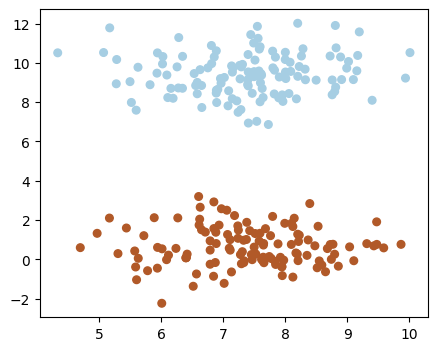

In [2]:
# we create 40 separable points
X, y = make_blobs(n_samples = 250 ,n_features= 2, centers = 2 , random_state = 8)
print (X.shape, y.shape)

_, ax = plt.subplots(figsize=(5,4))
##S= tamaño de puntos.
ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='Paired')

In [3]:
clf = SVC(kernel = "linear" , C = 1)
clf.fit(X, y)

SVC(C=1, kernel='linear')

In [4]:
h_min, h_max = X[:, 0].min()-0.5, X[:, 0].max()+0.5
v_min, v_max = X[:, 1].min()-0.5, X[:, 1].max()+0.5

# Crear el grid de las fronteras de decision
h_grid, v_grid = np.meshgrid(np.linspace( h_min, h_max , 200), np.linspace( v_min , v_max , 200))

# Predecir los valores del grid
pred_grid = clf.decision_function( np.c_[h_grid.ravel(), v_grid.ravel()])
print (pred_grid.shape)

# Encajar las predicciones al tamaño del grid
pred_grid = pred_grid.reshape( h_grid.shape )
print (pred_grid.shape)

(40000,)
(200, 200)


3


[]

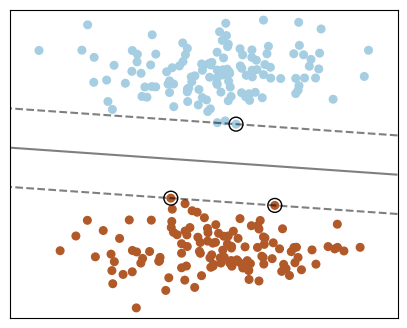

In [5]:
_, ax = plt.subplots (figsize=(5,4))
ax.scatter( X[:, 0] , X[:, 1] , c = y , s = 30, cmap = "Paired")

# plot decision boundary and margins
ax.contour( h_grid , v_grid , pred_grid , colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# plot support vectors- linea de soporte- facecolors='none'- linea transparente
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

##Cuantos vectores de soporte encuentra
print(len(clf.support_vectors_))

##ax.set_xlim(x_grid.min()-.1, x_grid.max()+.1)
##ax.set_ylim(y_grid.min()-.1, y_grid.max()+.1)

ax.set_xticks(())
ax.set_yticks(())

[]

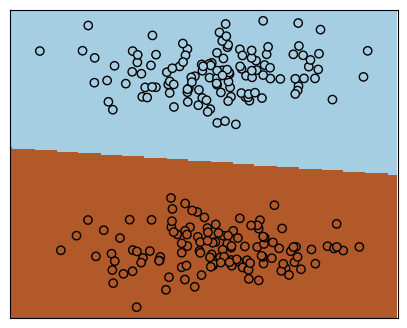

In [6]:
pred_grid = clf.predict(np.c_[h_grid.ravel(), v_grid.ravel()])
pred_grid = pred_grid.reshape(h_grid.shape)
_, ax = plt.subplots (figsize=(5,4))
ax.pcolormesh( h_grid , v_grid , pred_grid, cmap = "Paired")
ax.scatter( X[:, 0] , X[:, 1] , c = y, edgecolors='k', cmap='Paired')

ax.set_xticks(())
ax.set_yticks(())


## In real data

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris

In [18]:
# import some data to play with
iris = load_iris()
X = iris.data[:, 2:4]   # Pick 2 features
Y = iris.target

In [19]:
# Create an instance of SVM and fit the data.
clf = SVC (kernel='linear')
clf.fit( X , Y )

SVC(kernel='linear')

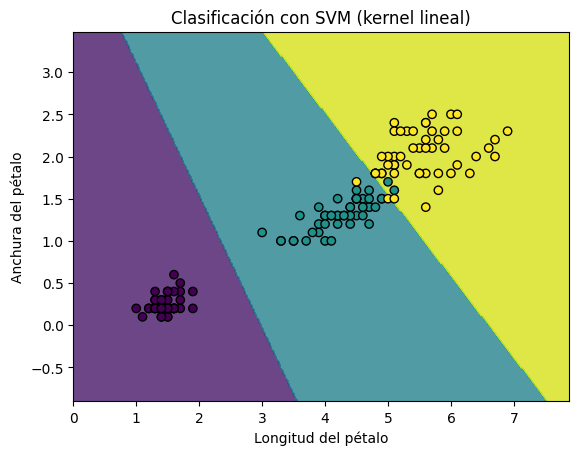

In [20]:
# Plot decision boundaries
# Crear una malla para trazar
h = .02  # Paso de la malla
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predecir las etiquetas para cada punto en la malla
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Trazar el contorno y los puntos de datos
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', marker='o')
plt.xlabel('Longitud del pétalo')
plt.ylabel('Anchura del pétalo')
plt.title('Clasificación con SVM (kernel lineal)')
plt.show()